In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_csv('/content/Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [49]:
data.shape

(891, 12)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Age,Cabin and Embarked has missing values. So we have to replace it.

In [52]:
data['Age'].fillna(data['Age'].median(),inplace=True)

/tmp/ipython-input-2124576783.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(),inplace=True)


In [53]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

/tmp/ipython-input-1523684883.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)


In [54]:
data.drop('Cabin',axis=1,inplace=True)

In [55]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Age is a continuous numerical variable, and there are outliers; therefore, it is filled with the median, which is robust to outliers.

Embarked is a categorical variable; therefore, it is filled by mode because it replaces missing values with the most common category.

The cabin is dropped due to too many missing values.

In [56]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Target Variable Distribution(Survival)

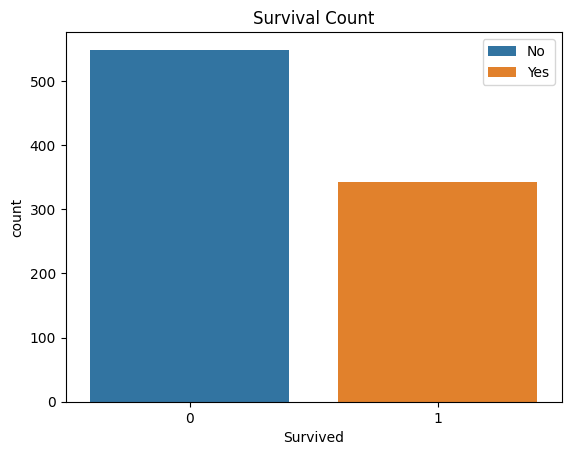

In [64]:
sns.countplot(x='Survived',hue='Survived',data=data)
plt.title('Survival Count')
plt.legend(labels=['No','Yes'])
plt.show()


In [63]:
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


We can see that most of the people did not survive

#Gender vs Survival

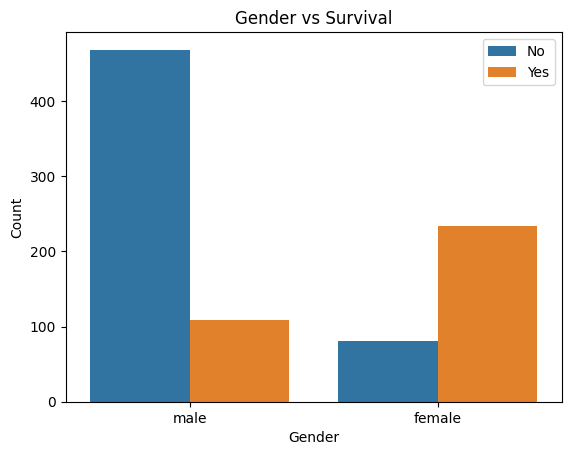

In [66]:
sns.countplot(x='Sex',hue='Survived',data=data)
plt.title('Gender vs Survival')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(labels=['No','Yes'])
plt.show()

Women have a much higher survival rate than men

#Passenger class vs Survival

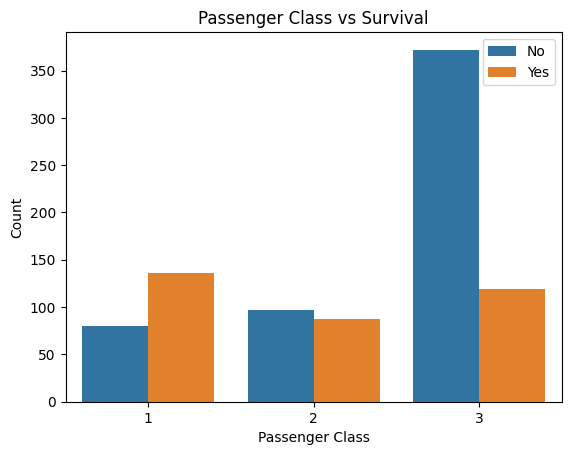

In [67]:
sns.countplot(x='Pclass',hue='Survived',data=data)
plt.title('Passenger Class vs Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(labels=['No','Yes'])
plt.show()

Higher-class passengers (1st class) were more likely to survive.

#Age Distribution

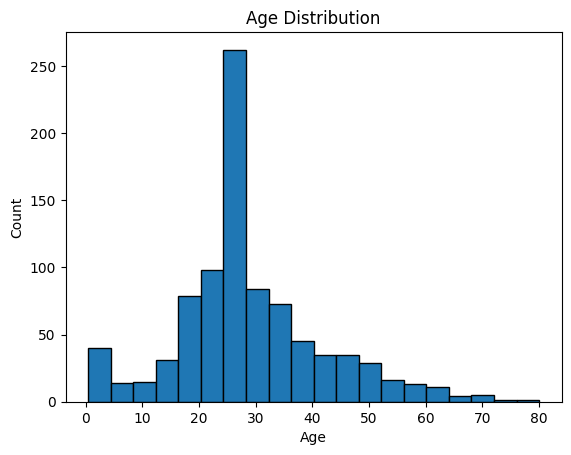

In [68]:
plt.hist(data['Age'],bins=20,edgecolor='Black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Most of the passengers were between 20 to 40

#Age vs Survival

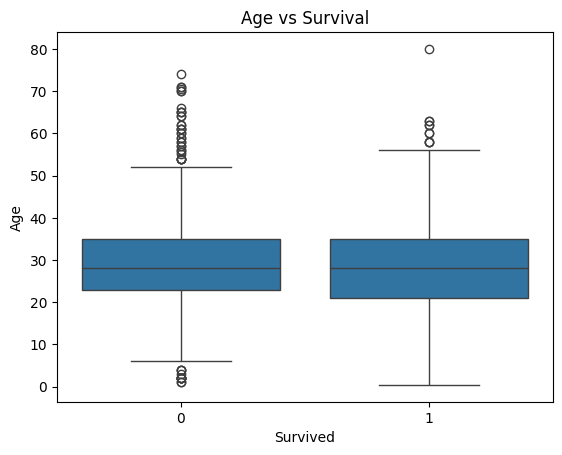

In [73]:
sns.boxplot(y='Age',x='Survived',data=data)
plt.title('Age vs Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

Younger passengers had slightly higher survival chances.

#correlation Heatmap

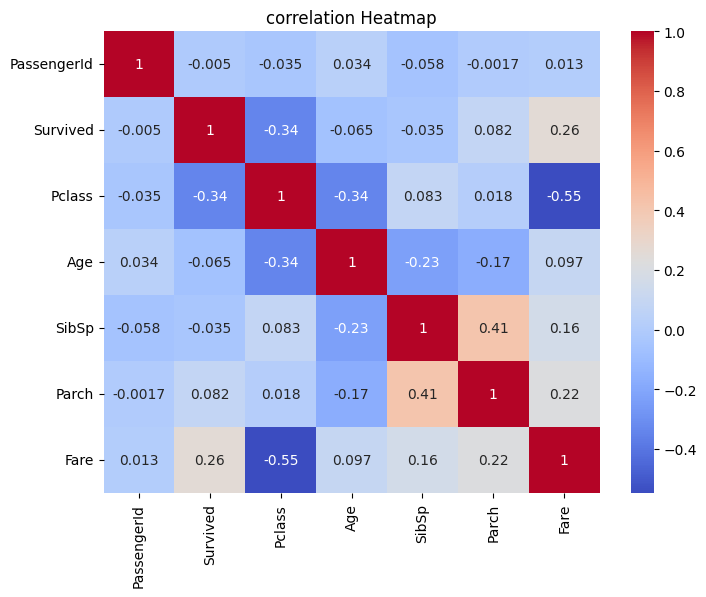

In [74]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('correlation Heatmap')
plt.show()

The correlation heatmap shows that survival on the Titanic is negatively correlated with passenger class (r = –0.34) and positively correlated with fare (r = 0.26). This suggests that wealthier passengers in higher classes had a better chance of survival.

Age shows a weak negative correlation with survival, indicating that younger passengers had slightly higher survival chances.But since correlation is weak, age wasn’t a strong predictor.

#Conclusion

The Titanic dataset reveals strong social and economic patterns in survival rates:

Women and children first principle is visible.

Wealthier passengers (1st class) had access to more lifeboats.

Socioeconomic status played a key role in survival probability.